In [58]:
import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt # Visualization 
import seaborn as sns
plt.style.use('fivethirtyeight')

import os

In [12]:
path="https://raw.githubusercontent.com/benvictoria21/panda/master/python%20pandas%20data/Graduate%20Admission%202/Admission_Predict.csv"
df=pd.read_csv(path)
#df1=pd.read_csv(path1)
df.head()  # Top 5 rows
df.tail()  # Bottom 5 rows
df.sample(5)  # Random 5 rows
df.sample(5) # random fractional numbers rows  of total no of rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
362,363,338,115,5,4.5,5.0,9.23,1,0.91
235,236,326,111,5,4.5,4.0,9.23,1,0.88
210,211,325,108,4,4.5,4.0,9.06,1,0.79
41,42,316,105,2,2.5,2.5,8.20,1,0.49
180,181,300,104,3,3.5,3.0,8.16,0,0.71


In [13]:
data=df.copy()

In [14]:
print("Columns of the data are:",df.columns)

Columns of the data are: Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [15]:
df=df.rename(columns={'Serial No.':'SerialNo', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL',
                      'University Rating':'UniversityRating','LOR ':'LOR','Chance of Admit ':'ChanceOfAdmit'})
df.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

In [16]:
#Drop the column "Serial No." 
df=df.drop(columns="SerialNo")

In [17]:
df.isnull().sum()

GRE                 0
TOEFL               0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE               400 non-null    int64  
 1   TOEFL             400 non-null    int64  
 2   UniversityRating  400 non-null    int64  
 3   SOP               400 non-null    float64
 4   LOR               400 non-null    float64
 5   CGPA              400 non-null    float64
 6   Research          400 non-null    int64  
 7   ChanceOfAdmit     400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [19]:
df.isnull().values.any()

False

In [20]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())

GRE
False    400
Name: GRE, dtype: int64
TOEFL
False    400
Name: TOEFL, dtype: int64
UniversityRating
False    400
Name: UniversityRating, dtype: int64
SOP
False    400
Name: SOP, dtype: int64
LOR
False    400
Name: LOR, dtype: int64
CGPA
False    400
Name: CGPA, dtype: int64
Research
False    400
Name: Research, dtype: int64
ChanceOfAdmit
False    400
Name: ChanceOfAdmit, dtype: int64


In [21]:
def missing_percentage(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percent=np.round(total/len(data)*100,2)
    return pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_percentage(df)

,Total,Percent
ChanceOfAdmit,0,0.0
Research,0,0.0
CGPA,0,0.0
LOR,0,0.0
SOP,0,0.0
UniversityRating,0,0.0
TOEFL,0,0.0
GRE,0,0.0


In [22]:
print("Shape of the data",df.shape)

Shape of the data (400, 8)


In [23]:
#statistical summary of the data
df.describe()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [24]:
# Groupby the data by "University rating".
df.groupby("UniversityRating").mean()

,GRE,TOEFL,SOP,LOR,CGPA,Research,ChanceOfAdmit
UniversityRating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [25]:
print(" Minimum requirements for more than 85% chance to get admission.\n",df[(df['ChanceOfAdmit']>0.85)].min())

 Minimum requirements for more than 85% chance to get admission.
 GRE                 320.00
TOEFL               108.00
UniversityRating      2.00
SOP                   3.00
LOR                   3.00
CGPA                  8.94
Research              0.00
ChanceOfAdmit         0.86
dtype: float64


In [26]:
df.pivot_table(values=['GRE','TOEFL'],index=['UniversityRating'],columns='Research',aggfunc=np.median)

GRE         TOEFL       
Research              0      1      0      1
UniversityRating                            
1                 300.0  311.0   99.0   99.0
2                 308.0  314.0  103.0  105.0
3                 313.0  321.0  105.0  108.0
4                 314.0  327.0  110.0  112.0
5                 315.5  331.0  108.5  115.0

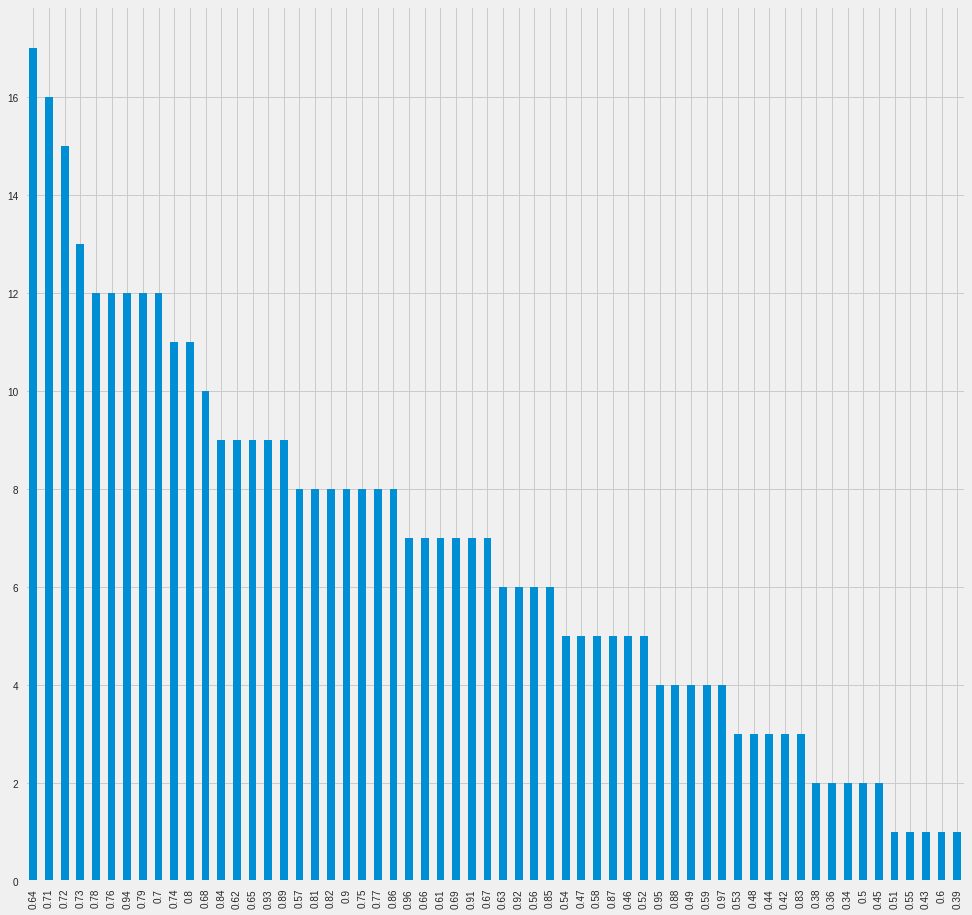

In [27]:
plt.figure(figsize=(15,15))
df['ChanceOfAdmit'].value_counts().plot.bar()
plt.show()

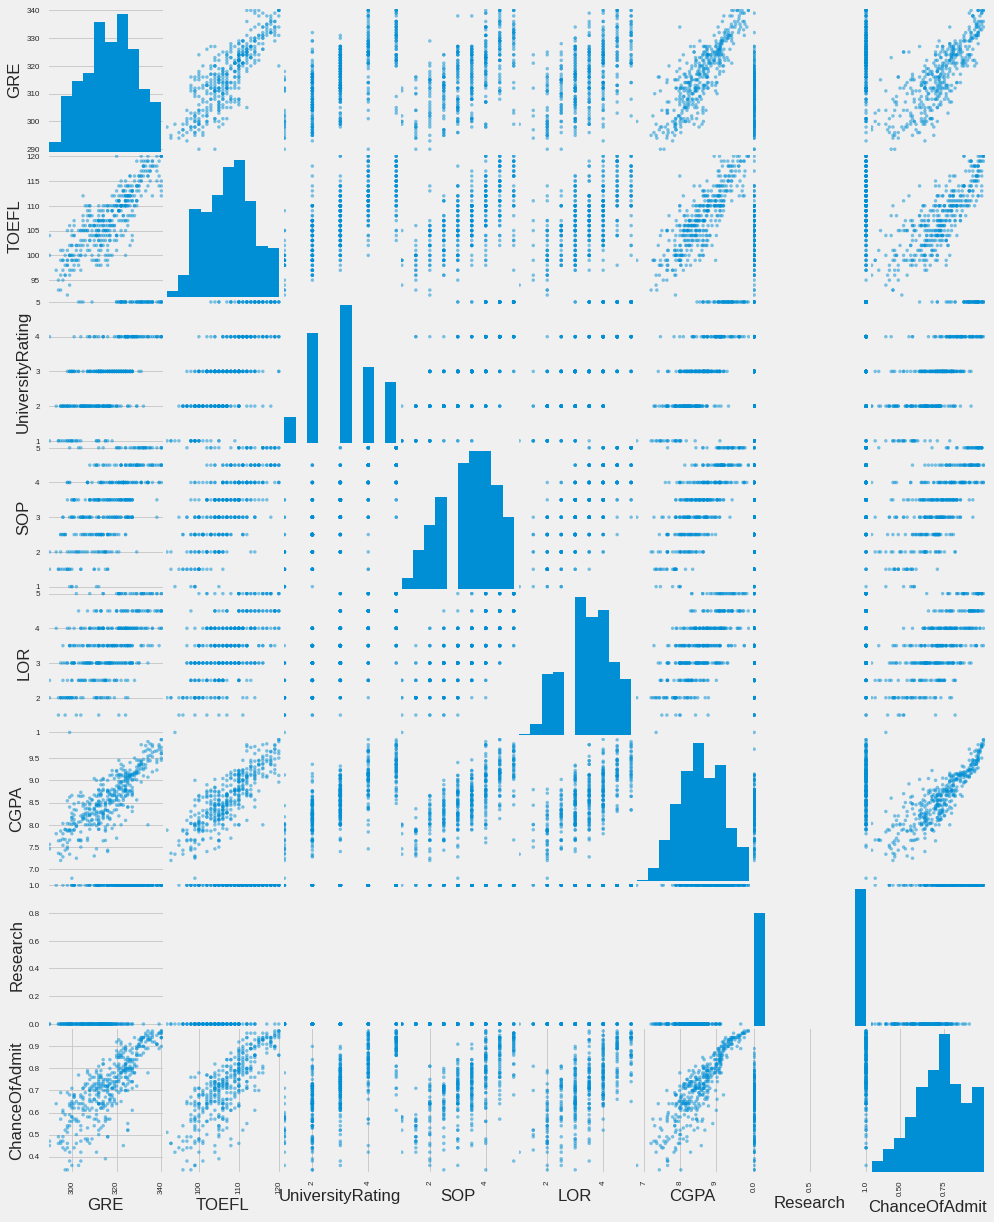

In [28]:
#relashionship between the variables of the data in scatter form.
pd.plotting.scatter_matrix(df,figsize=(15,20)) # Scatter matrix for the data.
plt.show()

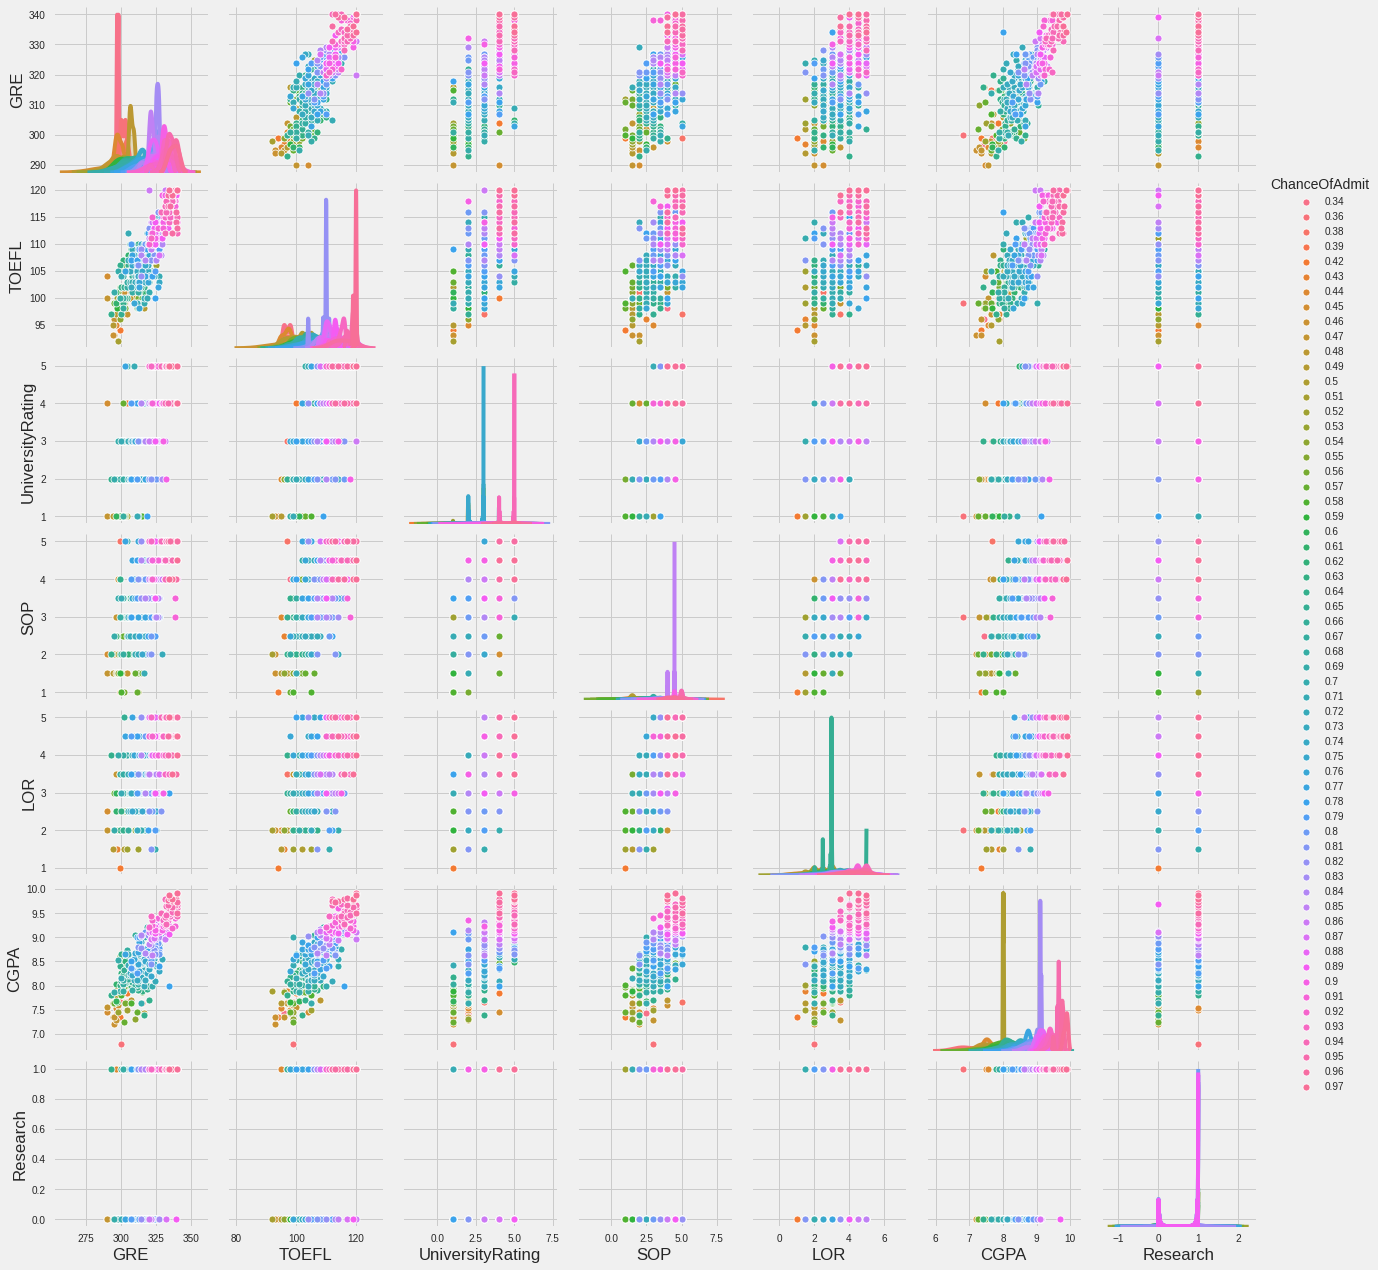

In [29]:
sns.pairplot(df,hue="ChanceOfAdmit")
plt.show()

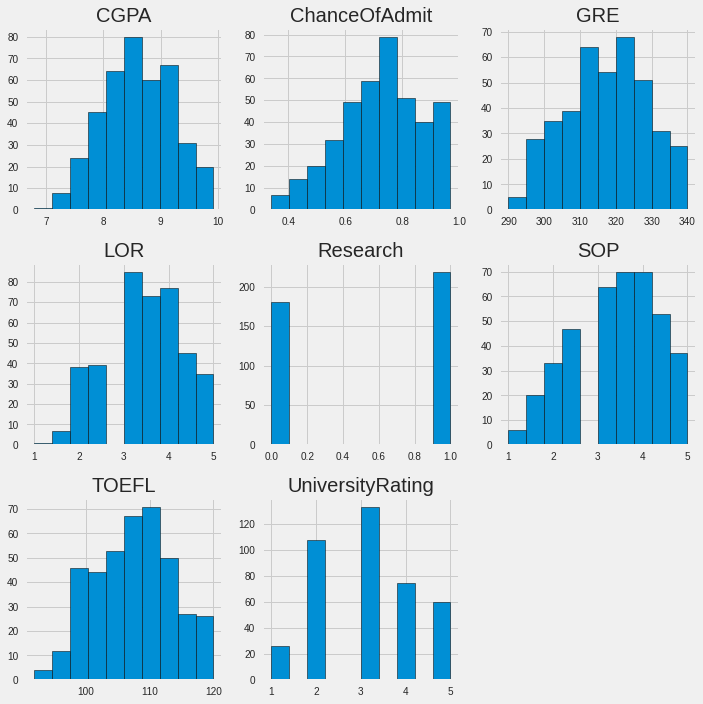

In [30]:
df.hist(figsize=(10,10),edgecolor="k")
plt.tight_layout()
plt.show()

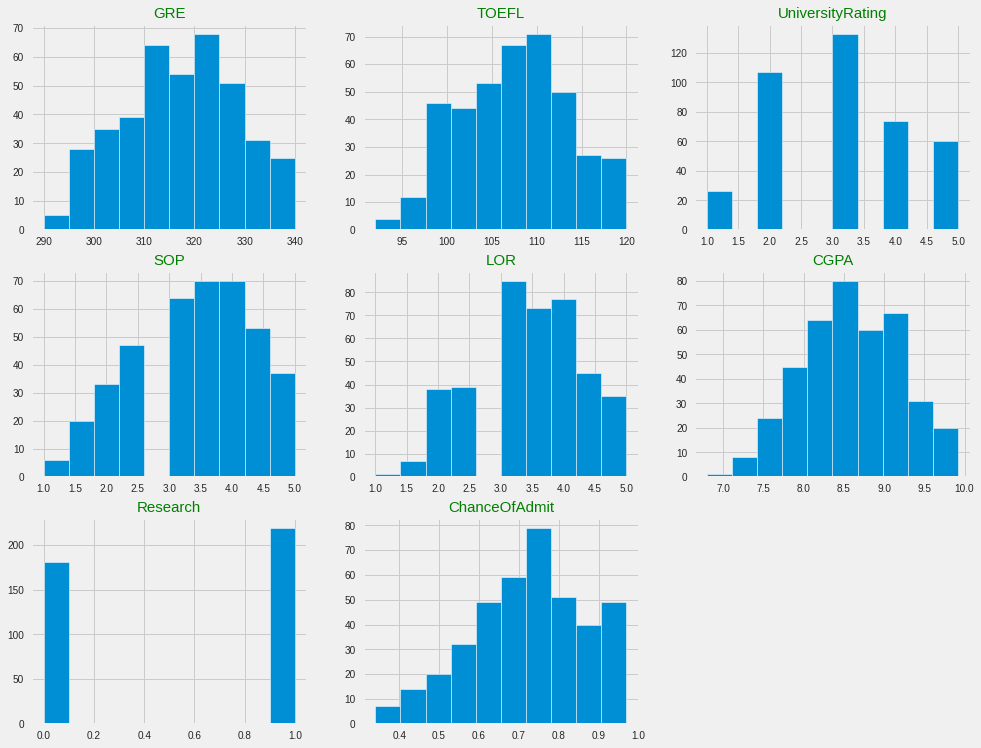

In [31]:
plt.figure(figsize=(15,12))
col_list=df.columns
 
for i in range(len(df.columns)):
    plt.subplot(3,3,i+1)
    plt.hist(df[col_list[i]],edgecolor="w")
    plt.title(col_list[i],color="g",fontsize=15)


plt.show()

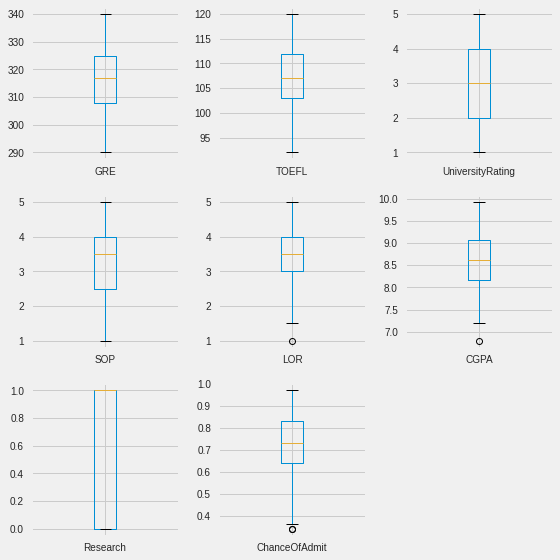

In [32]:
#Boxplot for all variables.
"""for col in df.columns:
    df[[col]].boxplot()
    plt.show()"""
df.plot(kind='box',subplots=True,layout=(3,3),grid=True,figsize=(8,8))
plt.tight_layout()

plt.show()

In [33]:
# Correlation Between the data features.
df.corr()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
UniversityRating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
ChanceOfAdmit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


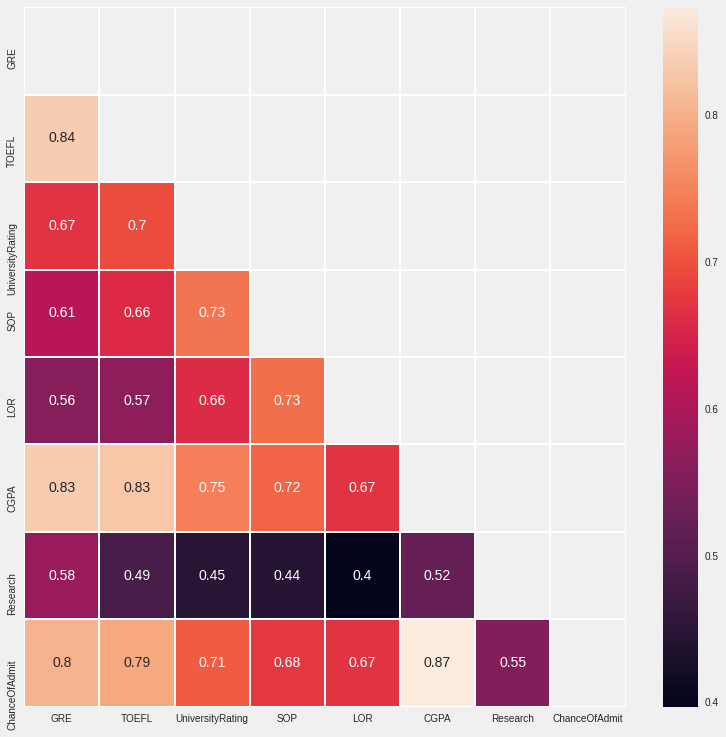

In [34]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=1.0)
plt.show()

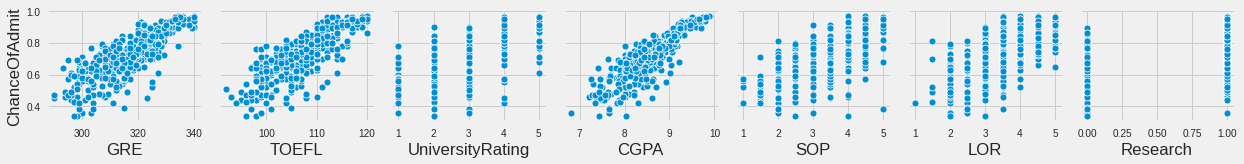

In [35]:
sns.pairplot(df,x_vars=['GRE','TOEFL','UniversityRating','CGPA','SOP','LOR','Research'],
             y_vars='ChanceOfAdmit')
plt.tight_layout()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [37]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [38]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)

#Testdata score
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred)

(0.7602413021172741, 0.004372009446239422)

In [40]:
#Training data score
ytrain_pred=lr.predict(X_train)
r2_score(y_train,ytrain_pred),mean_squared_error(y_train,ytrain_pred)

(0.8104654963277417, 0.003962387274382936)

In [41]:
print("Intercept of Linear Regression is:\n,",lr.intercept_,"Coefficients of Linear Regression are:\n,",lr.coef_)

Intercept of Linear Regression is:
, 0.7203333333333333 Coefficients of Linear Regression are:
, [ 0.0222774   0.01584825  0.00631219 -0.00721485  0.02051413  0.07725435
  0.01035641]


In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42,criterion="mse")
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
r2_score(y_test,y_pred_rf),mean_squared_error(y_test,y_pred_rf)

(0.7061275050671674, 0.005358776700000001)

In [43]:
feature_importance = pd.DataFrame(rf_model.feature_importances_, X.columns)
feature_importance

,0
GRE,0.094247
TOEFL,0.027032
UniversityRating,0.011184
SOP,0.029192
LOR,0.026964
CGPA,0.804537
Research,0.006844


In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 4,max_depth=4)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test) 
print(r2_score(y_test,y_pred_dt),mean_squared_error(y_test,y_pred_dt))

0.7241918800373587 0.005029372099843563


In [48]:
#classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

In [49]:
models=[LinearRegression(),
        RandomForestRegressor(n_estimators=100,max_depth=5),
        DecisionTreeRegressor(random_state=4,max_depth=5),GradientBoostingRegressor(),AdaBoostRegressor(),
        KNeighborsRegressor(n_neighbors=35),
        BaggingRegressor(),Ridge(alpha=1.0),RidgeCV(),SVR()]
model_names=['LinearRegression','RandomForestRegressor','DecisionTree','GradientBoostingRegressor','AdaBoost','kNN',
             'BaggingReg','Ridge','RidgeCV',"SVR"]

R2_SCORE=[]
MSE=[]
      
for model in range(len(models)):
    print("*"*35,"\n",model_names[model])
    reg=models[model]
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    r=r2_score(y_test,pred)
    mse=mean_squared_error(y_test,pred)
    R2_SCORE.append(r)
    MSE.append(mse)
    print("R2 Score",r)
    print("MSE",mse)

*********************************** 
 LinearRegression
R2 Score 0.7602413021172741
MSE 0.004372009446239422
*********************************** 
 RandomForestRegressor
R2 Score 0.7240754133407921
MSE 0.005031495874714123
*********************************** 
 DecisionTree
R2 Score 0.6652508612451318
MSE 0.006104163935160573
*********************************** 
 GradientBoostingRegressor
R2 Score 0.7145620431899911
MSE 0.005204972559948787
*********************************** 
 AdaBoost
R2 Score 0.6816871076628419
MSE 0.005804448324283771
*********************************** 
 kNN
R2 Score 0.7946084873419751
MSE 0.003745322448979591
*********************************** 
 BaggingReg
R2 Score 0.688422399950864
MSE 0.005681629999999998
*********************************** 
 Ridge
R2 Score 0.7609893111002508
MSE 0.004358369472514482
*********************************** 
 RidgeCV
R2 Score 0.7662056205334298
MSE 0.004263249861348088
*********************************** 
 SVR
R2 Score 0.6642107506715

   index        Modelling Algorithm  R2_score       MSE
0      5                        kNN  0.794608  0.003745
1      8                    RidgeCV  0.766206  0.004263
2      7                      Ridge  0.760989  0.004358
3      0           LinearRegression  0.760241  0.004372
4      1      RandomForestRegressor  0.724075  0.005031
5      3  GradientBoostingRegressor  0.714562  0.005205
6      6                 BaggingReg  0.688422  0.005682
7      4                   AdaBoost  0.681687  0.005804
8      2               DecisionTree  0.665251  0.006104
9      9                        SVR  0.664211  0.006123


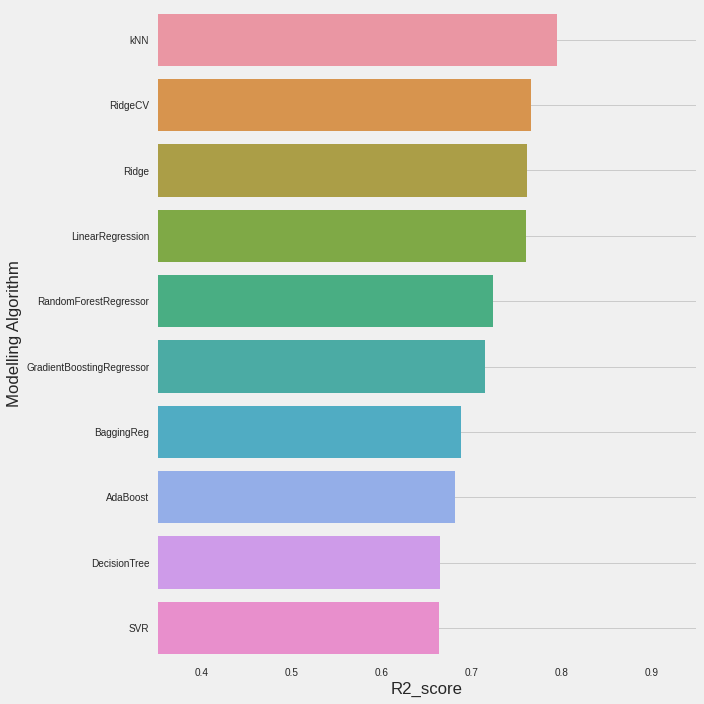

In [50]:
df_model=pd.DataFrame({'Modelling Algorithm':model_names,'R2_score':R2_SCORE,"MSE":MSE})
df_model=df_model.sort_values(by="R2_score",ascending=False).reset_index()
print(df_model)


plt.figure(figsize=(10,10))
sns.barplot(y="Modelling Algorithm",x="R2_score",data=df_model)

plt.xlim(0.35,0.95)
plt.grid()
plt.tight_layout()

In [51]:
df_model.head(5)

,index,Modelling Algorithm,R2_score,MSE
0,5,kNN,0.794608,0.003745
1,8,RidgeCV,0.766206,0.004263
2,7,Ridge,0.760989,0.004358
3,0,LinearRegression,0.760241,0.004372
4,1,RandomForestRegressor,0.724075,0.005031


In [52]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_lr_pred=lr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_lr_pred),"R2 SCORE:",r2_score(y_test,y_lr_pred))

MSE: 0.004372009446239422 R2 SCORE: 0.7602413021172741


In [53]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y_ridge=ridge.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_ridge),"R2 SCORE:",r2_score(y_test,y_ridge))

MSE: 0.004358369472514482 R2 SCORE: 0.7609893111002508


In [54]:
r_CV=RidgeCV()
r_CV.fit(X_train,y_train)
y_rCV=r_CV.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_rCV),"R2 SCORE:",r2_score(y_test,y_rCV))

MSE: 0.004263249861348088 R2 SCORE: 0.7662056205334298


In [55]:
tp=pd.DataFrame({"TEST_value":y_test,"LR_predict_value": y_lr_pred,"RIDGE_predict_value": y_ridge,"RCV_predict_value": y_rCV,"DIFF(TEST_value-LR_predict_value)": (y_test-y_lr_pred)})
tp.head()

,TEST_value,LR_predict_value,RIDGE_predict_value,RCV_predict_value,DIFF(TEST_value-LR_predict_value)
94,0.36,0.519078,0.519551,0.523262,-0.159078
32,0.91,0.924403,0.923962,0.920134,-0.014403
225,0.61,0.543870,0.543582,0.541747,0.066130
157,0.65,0.615362,0.614997,0.612249,0.034638
356,0.79,0.777678,0.777745,0.778064,0.012322


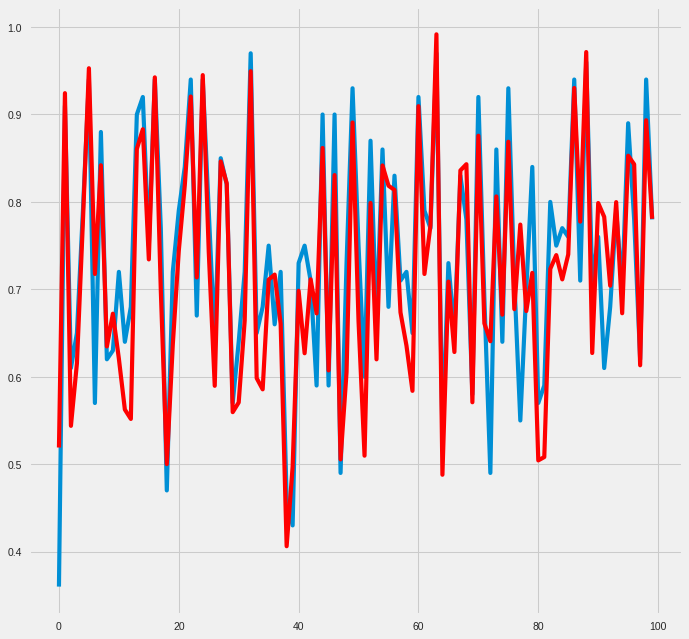

In [56]:
plt.figure(figsize=(10,10),dpi=75)
x=np.arange(len(tp["TEST_value"]))
y=tp["TEST_value"]
z=tp["LR_predict_value"]
plt.plot(x,y)
plt.plot(x,z,color='r')

In [57]:
print("Score of Linear Regression:",r2_score(y_test,y_lr_pred))

Score of Linear Regression: 0.7602413021172741
